In [3]:
import os
from imutils import paths as im_paths  # untuk mendapatkan daftar path gambar
from PIL import Image  # untuk membaca gambar dari path
import numpy as np  # untuk mengubah gambar ke bentuk array

folder_pilih =  ["Pongamia Pinnata (P7)", "Pomegranate (P9)"]

# Inisialisasi list untuk gambar dan label
labels = []
images = []

# Path ke folder dataset
image_path = im_paths.list_images("dataset/New folder/hb74ynkjcn-5")

# Loop melalui semua path gambar
for p in image_path:
    label = str(p).split("\\")

    if not label[1] in folder_pilih:
      continue

    # Gabungkan elemen ke-4 dan ke-5 menjadi satu label
    label_name = " ".join(label[1:3])  # label yang digunakan
    print(label_name)

      # Membaca gambar dan mengubah ukurannya
    image = Image.open(p).convert("RGB")  # memastikan gambar dibaca dalam mode RGB
    image = image.resize((255, 255))
    image = np.array(image) / 255.0  # normalisasi gambar ke [0, 1]
      # Tambahkan gambar dan label ke dalam list
    labels.append(label_name)
    images.append(image)

images = np.array(images)
labels = np.array(labels)

print(len(labels))
print(len(images))

Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate 

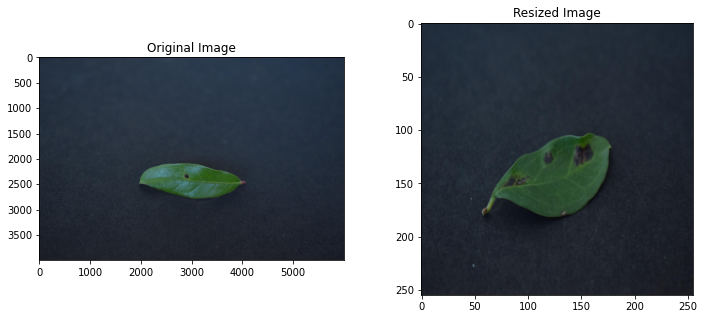

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

# Plot Loss dan Akurasi
plt.figure(figsize=(12, 5))

ori_image = Image.open("dataset/New folder/hb74ynkjcn-5/Pomegranate (P9)/diseased/0020_0272.JPG")
ori_image = np.array(ori_image)

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(ori_image)
plt.title('Original Image')

# Plot resized image
plt.subplot(1, 2, 2)
plt.imshow(images[0])
plt.title('Resized Image')

plt.show()

In [4]:
print(labels.shape)
print(images.shape)

(1157,)
(1157, 255, 255, 3)


In [14]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from PIL import Image
from imutils import paths as im_paths

In [7]:
# Ekstraksi fitur HOG dari setiap gambar
features = []
for image in images:
    # Konversi gambar ke grayscale untuk HOG
    gray_image = Image.fromarray((image * 255).astype('uint8')).convert("L")
    gray_image = np.array(gray_image)
    
    # Ekstraksi fitur HOG
    hog_feature = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
    features.append(hog_feature)

In [8]:
# Mengonversi list fitur dan label menjadi numpy array
features = np.array(features)
labels = np.array(labels)

In [9]:
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [10]:
# Buat dan latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9353448275862069
Classification Report:
                                 precision    recall  f1-score   support

     Pomegranate (P9) diseased       0.87      0.89      0.88        53
      Pomegranate (P9) healthy       0.90      0.90      0.90        67
Pongamia Pinnata (P7) diseased       1.00      0.98      0.99        52
 Pongamia Pinnata (P7) healthy       0.98      0.98      0.98        60

                      accuracy                           0.94       232
                     macro avg       0.94      0.94      0.94       232
                  weighted avg       0.94      0.94      0.94       232



In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[47  6  0  0]
 [ 7 60  0  0]
 [ 0  0 51  1]
 [ 0  1  0 59]]


In [16]:
print(y_test, y_pred)

['Pongamia Pinnata (P7) healthy' 'Pomegranate (P9) diseased'
 'Pomegranate (P9) diseased' 'Pomegranate (P9) healthy'
 'Pongamia Pinnata (P7) diseased' 'Pomegranate (P9) diseased'
 'Pongamia Pinnata (P7) healthy' 'Pomegranate (P9) healthy'
 'Pongamia Pinnata (P7) healthy' 'Pongamia Pinnata (P7) diseased'
 'Pomegranate (P9) healthy' 'Pomegranate (P9) healthy'
 'Pomegranate (P9) diseased' 'Pongamia Pinnata (P7) healthy'
 'Pomegranate (P9) diseased' 'Pongamia Pinnata (P7) healthy'
 'Pongamia Pinnata (P7) diseased' 'Pongamia Pinnata (P7) healthy'
 'Pongamia Pinnata (P7) healthy' 'Pongamia Pinnata (P7) healthy'
 'Pongamia Pinnata (P7) healthy' 'Pongamia Pinnata (P7) healthy'
 'Pomegranate (P9) diseased' 'Pomegranate (P9) healthy'
 'Pongamia Pinnata (P7) diseased' 'Pongamia Pinnata (P7) diseased'
 'Pomegranate (P9) healthy' 'Pomegranate (P9) healthy'
 'Pomegranate (P9) healthy' 'Pongamia Pinnata (P7) healthy'
 'Pomegranate (P9) healthy' 'Pomegranate (P9) healthy'
 'Pomegranate (P9) diseased' 

In [19]:
# Menghitung nilai MSE
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(labels)
y_test = le.transform(y_test)
y_pred = le.transform(y_pred)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.07758620689655173
